In [21]:
# import modules and libraries
import cv2
import numpy as np
import skimage
import skimage.color as skcolor
import skimage.io as sio
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib
import os
import statistics
import skimage.util as skt
from skimage.feature import blob_dog, blob_log, blob_doh

In [110]:
# try plugin command in imread (no significant difference)
imstack = sio.imread(path3, plugin="tifffile")
# checking data type of imported images
imstack.dtype

dtype('uint16')

In [102]:
path3 = r'C:\Users\robin\OneDrive\Documents\DIRECT\final_project\video3.tif'

img3 = sio.imread(path3)

gray = skimage.color.rgb2gray(img3[0,:])


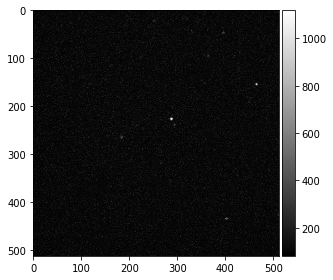

In [103]:
sio.imshow(gray, cmap=plt.cm.gray)

In [13]:
path3 = r'C:\Users\robin\OneDrive\Documents\DIRECT\final_project\video3.tif'

#this function should work out if the original file is rgb (one more column for color description)
img3 = sio.imread(path3)
graylist = []
for i in range(len(img3)):
    graylist.append(skimage.color.rgb2gray(img3[i,:]))
gray = np.asarray(graylist)
gray.shape
    


(1500, 512, 512)

In [14]:
maxlist = []
minlist = []
for i in range(len(gray)):
    gmax = np.amax(gray[i,:])
    gmin = np.amin(gray[i,:])
    maxlist.append(gmax)
    minlist.append(gmin)

#maxlist
graymax = np.asarray(maxlist).max()
graymin = np.asarray(minlist).min()
#print(graymax)
#print(graymin)



In [15]:
norm_gray = np.zeros(gray.shape)
for i in range(len(gray)):
    norm_gray[i, :] = ((gray[i, :] - graymin) / (graymax - graymin)) * 255

In [25]:
nmaxlist = []
nminlist = []
for i in range(len(norm_gray)):
    ngmax = norm_gray[i,:,:].max()
    ngmin = norm_gray[i,:,:].min()
    nmaxlist.append(ngmax)
    nminlist.append(ngmin)

#maxlist
ngraymax = np.asarray(nmaxlist).max()
ngraymin = np.asarray(nminlist).min()
ngraymean = np.asarray(norm_gray).mean()
ngraystd = np.asarray(norm_gray).std()


ngray = norm_gray.astype('uint16')
#print(graymin)
#print(ngraymax)
print(ngraystd)
print(ngraymean)
print(norm_gray.shape)

0.40601886325970776
2.1407675521500478
(1500, 512, 512)


In [26]:
# for some reason the algorithm works better in float datatype, so I'm using raw normalized image (float from 0 to 1) to find ROI
# LoG
# all the parameters can be further modified
roi1 = blob_log(norm_gray[0, :], max_sigma=30, num_sigma=10, threshold = ngraymean * 0.8 + 3 * ngraystd, overlap = 0.1)
roi1

array([[225., 289.,   1.],
       [155., 465.,   1.]])

In [30]:
#DoG
roi2 = blob_dog(norm_gray[0, :], max_sigma=30, threshold = ngraymean + 3 * ngraystd, overlap = 0.1)
roi2

array([[226.  , 288.  ,   2.56],
       [154.  , 465.  ,   2.56]])

In [28]:
#DoH
roi3 = blob_doh(norm_gray[0, :], max_sigma=30, num_sigma=10, threshold = ngraymean * 0.8)
roi3

array([[225.        , 287.        ,   4.22222222],
       [153.        , 465.        ,   4.22222222]])

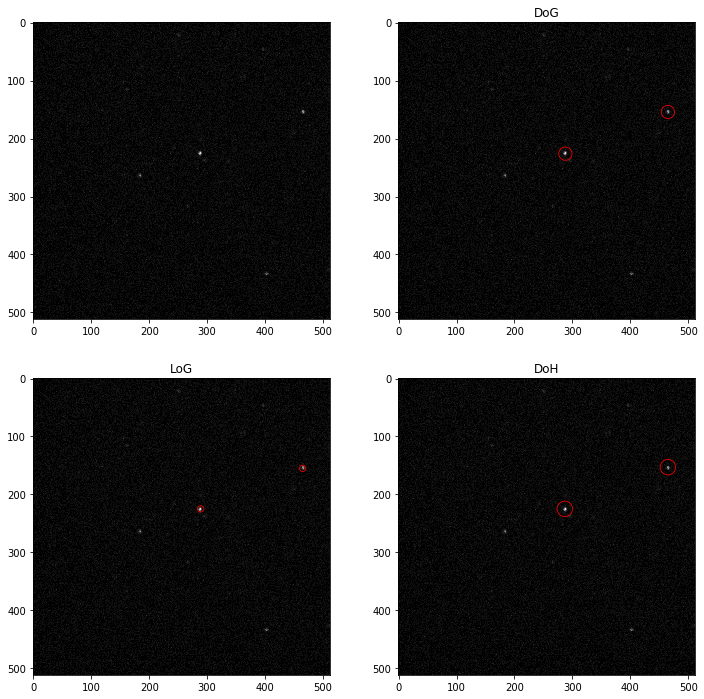

In [32]:
#plot and see the difference between three algorithms
fig,ax = plt.subplots(2, 2, figsize = (12, 12))
ax[0,0].imshow(ngray[0], cmap = matplotlib.cm.gray)
ax[1,0].imshow(ngray[0], cmap = matplotlib.cm.gray)
ax[0,1].imshow(ngray[0], cmap = matplotlib.cm.gray)
ax[1,1].imshow(ngray[0], cmap = matplotlib.cm.gray)

for i in range(len(roi1)):
    y, x, r = roi1[i]
    c1 = patches.Circle((x, y), r * np.sqrt(30), color = 'r', linewidth=0.8, fill=False)
    ax[1,0].add_patch(c1)

for i in range(len(roi2)):
    y, x, r = roi2[i]
    c2 = patches.Circle((x, y), r * np.sqrt(20), color = 'r', linewidth=0.8, fill=False)
    ax[0,1].add_patch(c2)
    
for i in range(len(roi3)):
    y, x, r = roi3[i]
    c3 = patches.Circle((x, y), r * np.sqrt(10), color = 'r', linewidth=0.8, fill=False)
    ax[1,1].add_patch(c3)

ax[1,0].set_title('LoG')
ax[0,1].set_title('DoG')
ax[1,1].set_title('DoH')
plt.show()    
fig.savefig('compare.tif')